In [9]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.0 MB 10.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 9.5 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/11.0 MB 9.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 9.7 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.5 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/44.5 MB 11.4 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/44.5 MB 11.8 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/44.5 MB 11.5 MB/s eta 0:00:04
   ---------- ----------------------------- 11.8/44.5 MB 11.5 MB/s eta 0:00:03
   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_excel('shop.xlsx')

In [40]:
df.head()

,age,income,sscore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [41]:
df.describe()

,age,income,sscore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     200 non-null    int64
 1   income  200 non-null    int64
 2   sscore  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [43]:
from sklearn.cluster import KMeans

In [44]:
my_cluster_model = KMeans(n_clusters=2)

In [45]:
my_cluster_model.fit(df)

KMeans(n_clusters=2)

In [46]:
df['cluster'] = my_cluster_model.labels_

In [47]:
df

,age,income,sscore,cluster
0,19,15,39,1
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1


In [48]:
my_cluster_model.cluster_centers_

array([[28.95294118, 62.17647059, 73.62352941],
       [46.16521739, 59.36521739, 32.88695652]])

In [51]:
sns.lmplot(x='income',y='sscore',data=df, hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

TypeError: lmplot() got an unexpected keyword argument 'z'

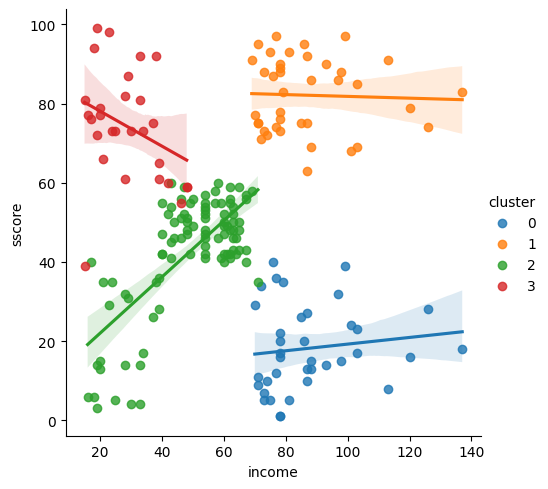

In [53]:
my_cluster_model = KMeans(n_clusters=4)
my_cluster_model.fit(df)
df['cluster'] = my_cluster_model.labels_
sns.lmplot(x='income',y='sscore',data=df, hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

In [54]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

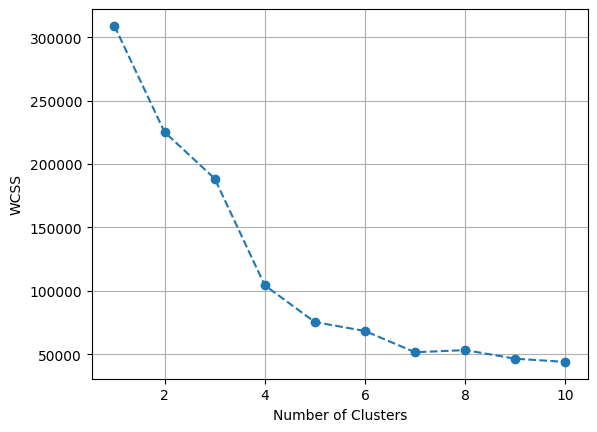

In [55]:
plt.plot(range(1,11),wcss,"o--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()